weather

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [28]:
from google.colab import files
uploaded = files.upload()

Saving daily-min-temperatures.csv to daily-min-temperatures (1).csv


In [29]:
url = pd.read_csv("daily-min-temperatures.csv")
print(url.head())
print(url.shape)

         Date  Temp
0  1981-01-01  20.7
1  1981-01-02  17.9
2  1981-01-03  18.8
3  1981-01-04  14.6
4  1981-01-05  15.8
(3650, 2)


In [30]:
df = pd.read_csv('daily-min-temperatures.csv', parse_dates=['Date'])
df.set_index('Date', inplace=True)

In [31]:
data = df['Temp'].values.reshape(-1,1)

In [32]:
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data)

In [33]:
def create_dataset(dataset,look_back=1):
  X,Y = [],[]
  for i in range(len(dataset)-look_back):
    X.append(dataset[i:(i+look_back),0])
    Y.append(dataset[i+look_back,0])
  return np.array(X),np.array(Y)

In [34]:
look_back = 7
X,Y = create_dataset(data_scaled,look_back)

In [35]:
X = np.reshape(X,(X.shape[0],X.shape[1],1))

In [36]:
train_size = int(len(X)*0.7)
X_train,X_test = X[:train_size],X[train_size:]
Y_train,Y_test = Y[:train_size],Y[train_size:]

In [37]:
model = Sequential()
model.add(LSTM(50,input_shape=(look_back,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [38]:
model.fit(X_train,Y_train,epochs=100,batch_size=32,verbose=2)

Epoch 1/100
80/80 - 2s - 25ms/step - loss: 0.0314
Epoch 2/100
80/80 - 0s - 5ms/step - loss: 0.0121
Epoch 3/100
80/80 - 1s - 8ms/step - loss: 0.0118
Epoch 4/100
80/80 - 0s - 5ms/step - loss: 0.0116
Epoch 5/100
80/80 - 1s - 8ms/step - loss: 0.0114
Epoch 6/100
80/80 - 0s - 5ms/step - loss: 0.0114
Epoch 7/100
80/80 - 0s - 5ms/step - loss: 0.0111
Epoch 8/100
80/80 - 0s - 5ms/step - loss: 0.0109
Epoch 9/100
80/80 - 1s - 7ms/step - loss: 0.0107
Epoch 10/100
80/80 - 0s - 5ms/step - loss: 0.0106
Epoch 11/100
80/80 - 0s - 5ms/step - loss: 0.0105
Epoch 12/100
80/80 - 1s - 8ms/step - loss: 0.0103
Epoch 13/100
80/80 - 0s - 5ms/step - loss: 0.0101
Epoch 14/100
80/80 - 0s - 5ms/step - loss: 0.0101
Epoch 15/100
80/80 - 1s - 8ms/step - loss: 0.0099
Epoch 16/100
80/80 - 0s - 5ms/step - loss: 0.0096
Epoch 17/100
80/80 - 0s - 5ms/step - loss: 0.0096
Epoch 18/100
80/80 - 1s - 8ms/step - loss: 0.0094
Epoch 19/100
80/80 - 1s - 8ms/step - loss: 0.0093
Epoch 20/100
80/80 - 1s - 8ms/step - loss: 0.0093
Epoch 21

In [39]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [40]:
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

In [41]:
train_score = np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0]))
test_score = np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0]))
print(f'Train RMSE: {train_score:.2f}')
print(f'Test RMSE: {test_score:.2f}')

Train RMSE: 2.49
Test RMSE: 2.32


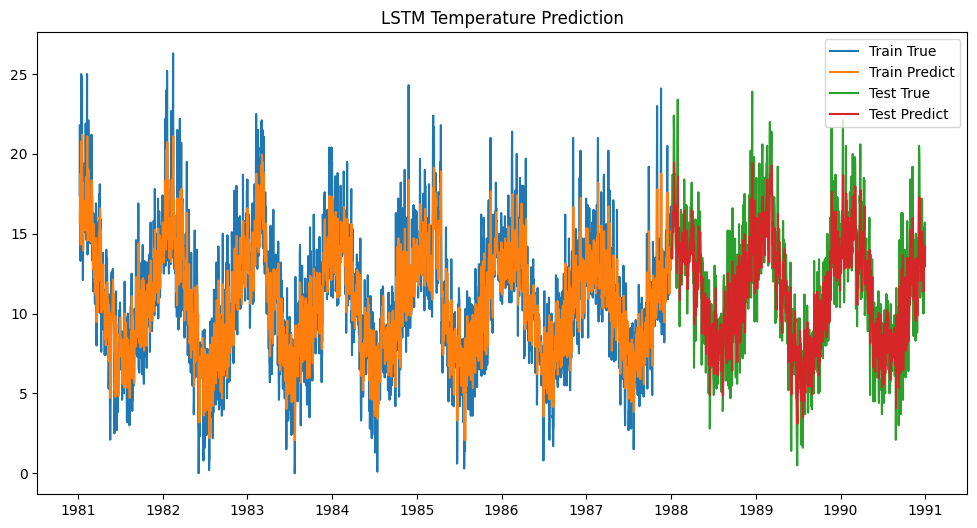

In [42]:
plt.figure(figsize=(12,6))
plt.plot(df.index[look_back:train_size+look_back], Y_train[0], label='Train True')
plt.plot(df.index[look_back:train_size+look_back], train_predict[:,0], label='Train Predict')
plt.plot(df.index[train_size+look_back:], Y_test[0], label='Test True')
plt.plot(df.index[train_size+look_back:], test_predict[:,0], label='Test Predict')
plt.legend()
plt.title('LSTM Temperature Prediction')
plt.show()

In [43]:
#---------------
input_seq = X_test[-1]

In [44]:
predicted_days = []
current_input = input_seq.copy()

In [45]:
for _ in range(7):  # پیش‌بینی 7 روز آینده
    # مدل ورودی به شکل (1, time_steps, features) میخواد
    current_input_reshaped = current_input.reshape((1, current_input.shape[0], 1))
    pred = model.predict(current_input_reshaped)[0,0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [46]:
predicted_days.append(pred)

In [47]:
current_input = np.append(current_input[1:], pred)

In [48]:
predicted_days = np.array(predicted_days).reshape(-1,1)
predicted_days_original = scaler.inverse_transform(predicted_days)

In [49]:
print("پیش‌بینی دمای 7 روز آینده:")
print(predicted_days_original.flatten())

پیش‌بینی دمای 7 روز آینده:
[14.219624]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━

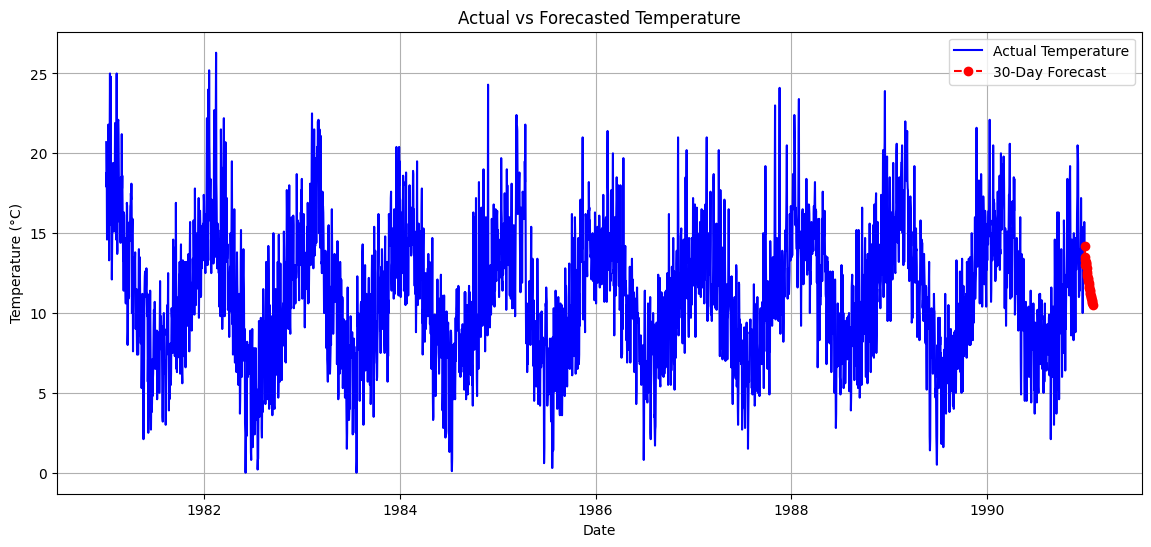

In [50]:
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)

input_seq = X_test[-1].copy()
predicted_days = []

for _ in range(30):
    current_input_reshaped = input_seq.reshape((1, input_seq.shape[0], 1))
    pred = model.predict(current_input_reshaped)[0,0]
    predicted_days.append(pred)
    input_seq = np.append(input_seq[1:], pred)

predicted_days = np.array(predicted_days).reshape(-1,1)
predicted_days_original = scaler.inverse_transform(predicted_days)

all_dates = list(df.index) + list(future_dates)
all_temps = list(df['Temp']) + [None]*30

plt.figure(figsize=(14,6))

plt.plot(df.index, df['Temp'], color='blue', label='Actual Temperature')

plt.plot([df.index[-1]] + list(future_dates),
         [df['Temp'].iloc[-1]] + list(predicted_days_original.flatten()),
         linestyle='--', marker='o', color='red', label='30-Day Forecast')

plt.title('Actual vs Forecasted Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()